# NHL 24 HUT World Championship, a Post Motreum Analysis
### What went wrong

NHL 24 is a game produced by EA Sports. HUT stands for "Hockey Ultimate Team" where you create your own version of an allstar team overtime. This was a widely publisised event and you had to sign up ahead of time several weeks in advance. I went into it without many expectations. I certianly don't think I am bad but I know I am not good. Well I got my ass beat, very bad. These games were long format and an entire game would take about half an hour, using Stanley Cup rules (5v5 OT, no shootout).

My motivation is to figure out what went wrong and how I can be better. I had some stats going into this that might be able to help me discern tangiable stategies from improvement. This is the type of analysis I do to figure out any type of issue. I don't consider my self a data scientest anymore, I am just a dude who got put to shame and I want to be better next time around. I normally don't use Jupyter, I am kind of set in my ways, but this is a nice way to tell a story using data.

When I was just starting my career in Data, I spent a lot of time looking at FiveThirtyEight. Nate Silver is a legend and I totally think that taking an abstract kind of weird issue like getting lit up in video games can have real world learnings if you distill them right. |

##### Import Packages 
This is how you import packages in Python. Most of this stuff comes preloaded in the anaconda distribution, which I have helped dozens of people get familar with over my career.

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, Normalize
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from pandasql import sqldf
from IPython.display import display, HTML, Image
import statsmodels.api as sm
import statsmodels.formula.api as smf


def sqlQuery(string):
    '''
    Parameters
    ----------
    string : String of SQL query using dataframes in document
    Returns
    -------
    SQL Query
    '''
    return sqldf(string, globals())

##### Get Data
I have three types of data I am going to use. I have data from the world championship games, I have data from my season leading up (shorter format games), and I have some shot data from 2 particually bad games that I transcribed for this purpose.

In [128]:
#get data 
net_pic = r"C:\Users\calholt\Documents\Callaway\NHL24\Data\CleanNet.PNG"
path = r"C:\Users\calholt\Documents\Callaway\NHL24\Data\NHL Scores 01152024-2.xlsx"
overload_pic = r"C:\Users\calholt\Documents\Callaway\NHL24\Data\Overload Strat Pic.PNG"
breakout = r"C:\Users\calholt\Documents\Callaway\NHL24\Data\up-hockey-breakout.jpg"
pp_strat = r"C:\Users\calholt\Documents\Callaway\NHL24\Data\PP Strat.PNG"
shots = pd.read_excel(path, sheet_name = 'Shot Raw Data')
regular = pd.read_excel(path, sheet_name = 'Data', header = 5)
wc = pd.read_excel(path, sheet_name = 'WC Data', header = 5)
players = pd.read_excel(path, sheet_name = 'Team Info', header = 5)

#cut out bad data 
wc.drop(columns = ['Unnamed: 17','SMA'], inplace = True)
regular.drop(columns = ['Unnamed: 12','SMA'], inplace = True)
shots.fillna(0, inplace = True)



##### Import Packages 
This is how you import packages in Python. Most of this stuff comes preloaded in the anaconda distribution, which I have helped dozens of people get familar with over my career.

In [102]:
players.head()

,Player,Line,Position,Shoots,Style,Capatancy,Ovr,Skate,Shoot,Hands,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,SMA
0,Alex Ovechkin,F1,Left Wing,Right,Sniper,Captian,85,85.0,89.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,NaN,NaN
1,Connor Bedard,F1,Center,Right,Sniper,Assistant Captian,86,87.0,90.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,NaN,NaN
2,The Nasher,F1,Right Wing,Left,Playmaker,NaN,87,90.0,90.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,David Pastrnak,F2,Left Wing,Right,Sniper,NaN,86,89.0,92.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,NaN,NaN
4,Trevor Zegras,F2,Center,Left,Playmaker,NaN,85,88.0,86.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


## Meet the Team
Lets meet the team. EA is very guilty of running a pay to play (*play well*) strategy in their games. You can basically pay money for better players. I haven't done this and so my team was certianly below average in terms of skill. Nonetheless, its still many of my favorite players and if this were a real team, I think they would be an absolute wagon with tons of fan appeal. 

In [111]:
# using SQL because its easier and faster for me. I don't like pandas groupby as great as pandas is. 
team = sqlQuery("""
            select 
                Player
                ,Line
                ,Position
                ,Shoots
                ,Style
                ,min(Ovr) as Skill
            from players
            group by line, Player, Style
            order by line asc
            """)
team

,Player,Line,Position,Shoots,Style,Skill
0,Quinn Hughes,D1,Right Defense,Left,Offensive Defenseman,85
1,Seth Jones,D1,Left Defense,Right,Two Way Defenseman,89
2,Brock Faber,D2,Left Defense,Right,Two Way Defenseman,86
3,John Carlson,D2,Right Defense,Right,Two Way Defenseman,83
4,Adam Fox,D3,Left Defense,Right,Offensive Defenseman,84
5,Drew Doughty,D3,Right Defense,Right,Two Way Defenseman,83
6,Alex Ovechkin,F1,Left Wing,Right,Sniper,85
7,Connor Bedard,F1,Center,Right,Sniper,86
8,The Nasher,F1,Right Wing,Left,Playmaker,87
9,David Pastrnak,F2,Left Wing,Right,Sniper,86


There isn't really one scorer that I count on more than others. Ovechkin has the most points followed by Nasher and Pasta. My D men also rack up many points. My team is all Playmakers and Snipers and my defense is offensively biased. My team is all gas no breaks. My only player in the 90's range is a new addition. Most of my opponents had multiple players 90+ skill. Overall, my teams average is an 83 skill.

## Our Strategy
Like I said my team is really set up to be Snipers, meaning we are going to try and put accurate shots on net to score. My team is set up to look for a shot on the weak side (where the defenses attention is shifted). The best player in the world (Alex Ovechkin) is about to surpass Wayne Gretky for goal scoring, a milestone thought improssible to surpass, from standing at the top of the left circle and hammering shots when the play is on the right side of the ice and no one is looking at him. 

In [124]:
iframe_code = """
<iframe src="https://giphy.com/embed/3iyVPUiICrqJtmv00I" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>
<p><a href="https://giphy.com/gifs/nhl-caps-capitals-3iyVPUiICrqJtmv00I">via GIPHY</a></p>
"""

# Displaying the HTML content in the Jupyter Notebook
display(HTML(iframe_code))


#### Even Strength

My best two lines run an overload strategy. 
The overload strategy in even-strength situations is about creating advantages by strategically positioning players and exploiting defensive weaknesses. It requires effective communication, player movement, and an understanding of the opponent's defensive structure. Coaches may implement specific systems or plays to encourage an overload in certain areas of th

My bottom two lines Crash the Net, meaning they take the puck hard to the net to see what happens. They end up shooting a lot though also just like lines 1 and 2. This actually could help them with goal production and lucky, dirty goals. e offensive zone.

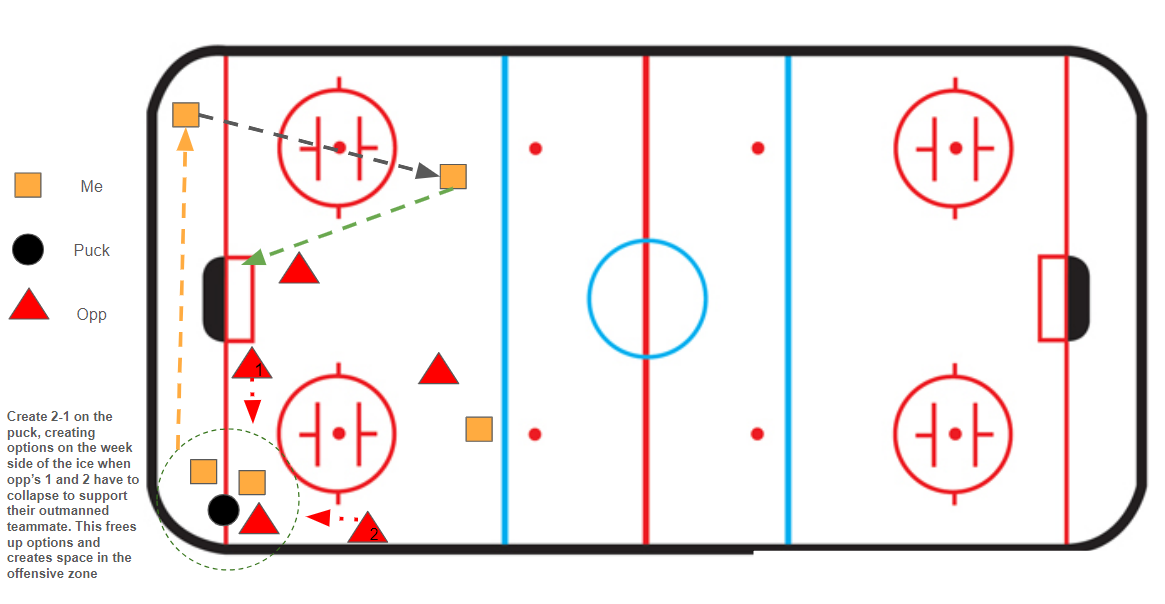

In [122]:
display(Image(filename=overload_pic))

#### Breakout

When I am stuck in my D zone, I try to get out out the zone by having the center swing high and catch a long breakout pass or the week side wing go even higher. This is pretty standard 14 year old level hockey stuff but works for me. This is because my puck possession game is weak and the less I can have the puck skating though the neautral zone, the better. e.

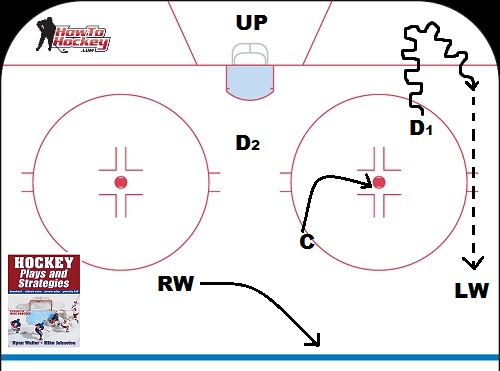

In [126]:
display(Image(filename=breakout))

#### Powerplay

I use an umbrella strategy in the power play. Because of all of the weapons I have at my disposal, I don't need to favor a particular side of the ice, but ideally we want a pass to shift the play and open a scoring lane off to the weak side. My second power play unit is very similar in makeup and approach

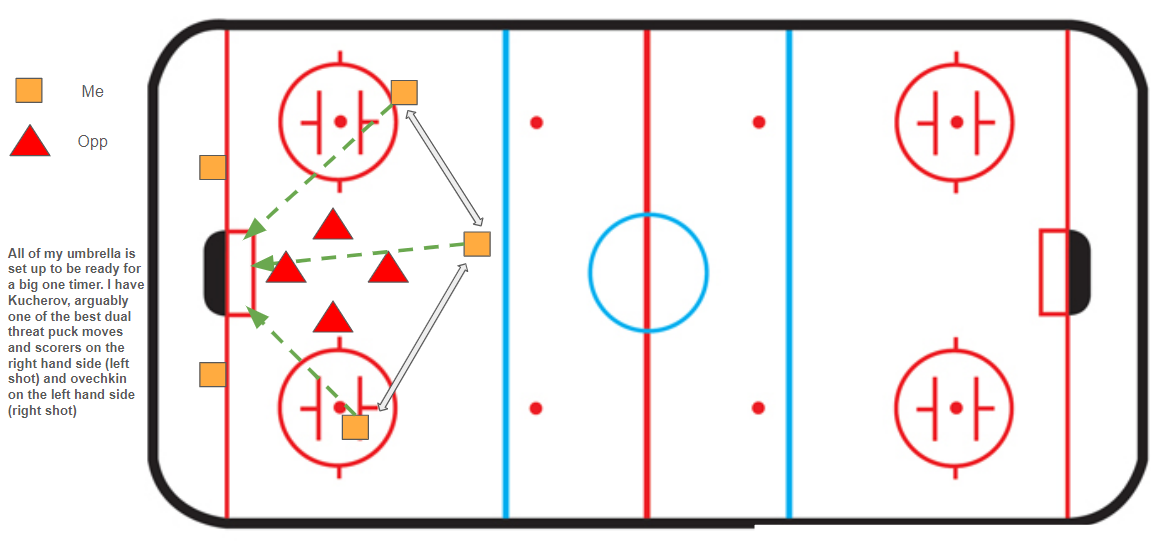

In [129]:
display(Image(filename=pp_strat))

## Momentum Going Into WC
Lets look at how I was doing going into the tournament. These data come from games that were in a 2 minute period format, so they were quick games. Since starting my data tracking, my record is 20-24-4

In [133]:
pd.DataFrame(regular.Outcome.value_counts())

,count
Outcome,
W,18
L,18
OTL,6
SOL,4
OTW,2


#### Scoring and Shooting

Lets look at how I was scoring over time

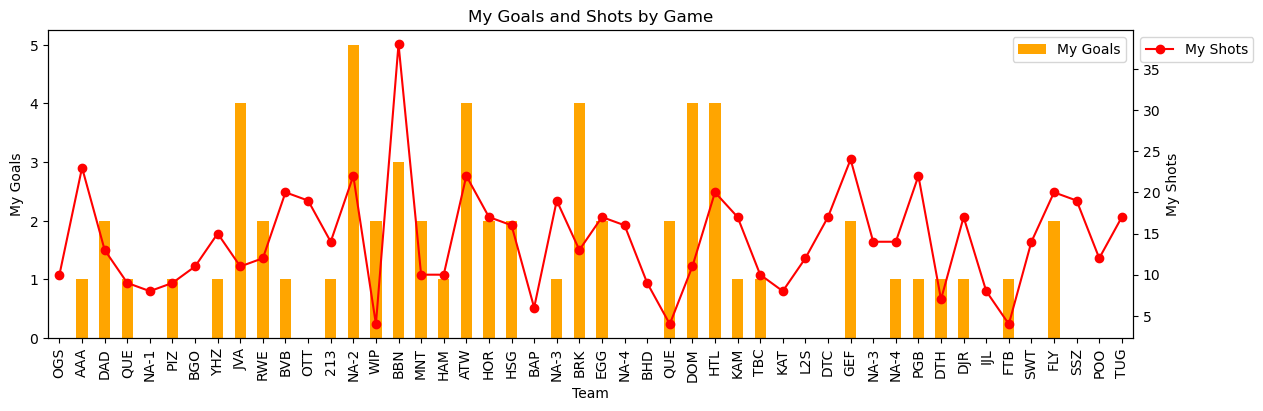

In [153]:
ax1 = regular.plot(kind = 'bar', y = 'MNA', x = 'Team', figsize = (14,4), color = 'orange', label = 'My Goals')
ax2 = ax1.twinx()
regular.plot(kind='line', y='MNA Shots', ax=ax2, color='red', marker='o', label='My Shots')
ax1.set_ylabel('My Goals')
ax2.set_ylabel('My Shots')
plt.title('My Goals and Shots by Game')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Lets think a little harder about this. What does average look like in this situation with shots and goals? A regression would let me know the influence shots have ontop of goals for every incrimental shot (beta coeff), beyond the starting point (y int)

In [171]:
from patsy import dmatrices

# Specify the formula using the Q() function for the column with spaces
formula = 'MNA ~ Q("MNA Shots")'

# Create matrices for the model
y, X = dmatrices(formula, data=regular, return_type='dataframe')

# Fit the linear regression model
model = sm.OLS(y, X).fit()

formatted_formula = f"{model.model.endog_names} = {model.params[0]:.2f} + {model.params[1]:.2f} * {model.model.exog_names[1]}"
print("Regression Formula:")
print(formatted_formula)

# Display the regression results
print(model.summary())


Regression Formula:
MNA = 0.42 + 0.06 * Q("MNA Shots")
                            OLS Regression Results                            
Dep. Variable:                    MNA   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.305
Date:                Mon, 15 Jan 2024   Prob (F-statistic):             0.0436
Time:                        20:20:14   Log-Likelihood:                -80.044
No. Observations:                  48   AIC:                             164.1
Df Residuals:                      46   BIC:                             167.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Wow this isn't good. Basically what this means is that on a average my team will score half a goal and for every additional 16 shots I will score 1 goal beyond that. That is evident when you take the following formula:

In [172]:
print(formatted_formula)

MNA = 0.42 + 0.06 * Q("MNA Shots")


and do the following:

In [181]:
beta_coeff = .0625

print(int(100/(beta_coeff * 100)), " Shots needed per goal")


16  Shots needed per goal


Ok so thats pretty bad which explains the following chart of my opponent and I:

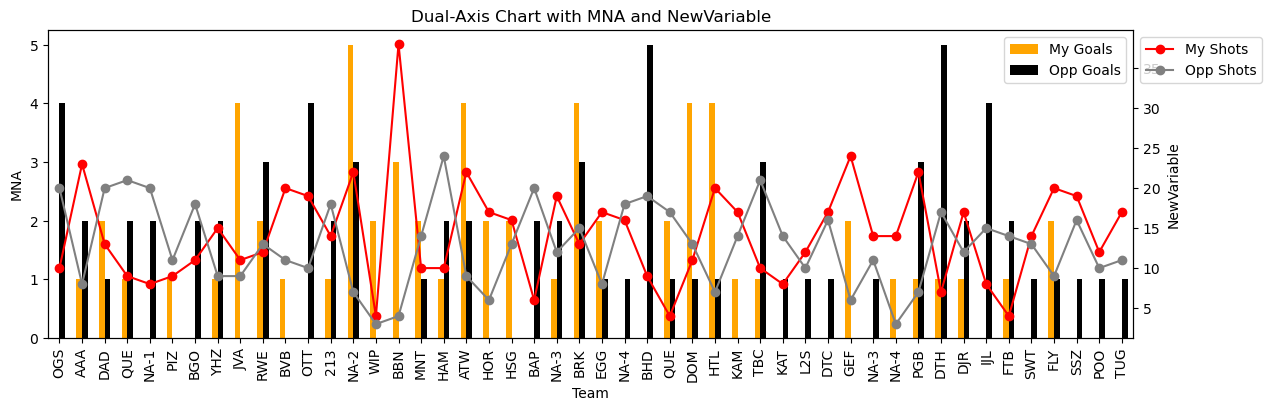

In [162]:
ax1 = regular.plot(kind = 'bar', y = ['MNA','Opp'], x = 'Team', figsize = (14,4), color = ['orange','black'], label = ['My Goals','Opp Goals'])

# Plot the first variable on the primary y-axis
#ax1 = df.plot(kind='bar', y='MNA', x='Team', figsize=(12, 4), color='blue', label='MNA')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second variable on the secondary y-axis
regular.plot(kind='line', y=['MNA Shots', 'Opp Shots'], ax=ax2, color=['red', 'grey'], marker='o', label=['My Shots', 'Opp Shots'])

# Set labels and legend
ax1.set_ylabel('MNA')
ax2.set_ylabel('NewVariable')
plt.title('Dual-Axis Chart with MNA.0 and NewVariable')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'MNA1', 'MNA2', 'NewVariable1', 'NewVariable2', and 'Team'

# Plot the first set of bars and lines on the primary y-axis
ax1 = df.plot(kind='bar', y=['MNA1', 'MNA2'], x='Team', figsize=(12, 4), color=['blue', 'green'])
ax1.set_ylabel('MNA')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second set of lines on the secondary y-axis
df.plot(kind='line', y=['NewVariable1', 'NewVariable2'], ax=ax2, color=['red', 'orange'], marker='o')

# Set labels and legend
ax2.set_ylabel('NewVariable')
plt.title('Dual-Axis Chart with MNA and NewVariable for Each Team')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


KeyError: "None of [Index([('OGS', 'AAA', 'DAD', 'QUE', 'NA-1', 'PIZ', 'BGO', 'YHZ', 'JVA', 'RWE', 'BVB', 'OTT', '213', 'NA-2', 'WIP', 'BBN', 'MNT', 'HAM', 'ATW', 'HOR', 'HSG', 'BAP', 'NA-3', 'BRK', 'EGG', 'NA-4', 'BHD', 'QUE', 'DOM', 'HTL', 'KAM', 'TBC', 'KAT', 'L2S', 'DTC', 'GEF', 'NA-3', 'NA-4', 'PGB', 'DTH', 'DJR', 'IJL', 'FTB', 'SWT', 'FLY', 'SSZ', 'POO', 'TUG'),\n                                                                                                                                                                                                             (0, 1, 2, 1, 0, 1, 0, 1, 4, 2, 1, 0, 1, 5, 2, 3, 2, 1, 4, 2, 2, 0, 1, 4, 2, 0, 0, 2, 4, 4, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0),\n                                                                                                                                                                                                             (4, 2, 1, 2, 2, 0, 2, 2, 0, 3, 0, 4, 2, 3, 0, 0, 1, 2, 2, 0, 0, 2, 2, 3, 1, 1, 5, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 0, 3, 5, 2, 4, 2, 1, 1, 1, 1, 1),\n                                                                                                                                                                        (10, 23, 13, 9, 8, 9, 11, 15, 11, 12, 20, 19, 14, 22, 4, 38, 10, 10, 22, 17, 16, 6, 19, 13, 17, 16, 9, 4, 11, 20, 17, 10, 8, 12, 17, 24, 14, 14, 22, 7, 17, 8, 4, 14, 20, 19, 12, 17),\n                                                                                                                                                                           (20, 8, 20, 21, 20, 11, 18, 9, 9, 13, 11, 10, 18, 7, 3, 4, 14, 24, 9, 6, 13, 20, 12, 15, 8, 18, 19, 17, 13, 7, 14, 21, 14, 10, 16, 6, 11, 3, 7, 17, 12, 15, 14, 13, 9, 16, 10, 11),\n                                                                                     ('OTL', 'SOL', 'W', 'L', 'L', 'W', 'L', 'OTL', 'W', 'OTL', 'W', 'L', 'SOL', 'W', 'W', 'W', 'OTW', 'OTL', 'W', 'W', 'W', 'L', 'OTL', 'W', 'W', 'SOL', 'L', 'W', 'W', 'W', 'OTW', 'L', 'SOL', 'L', 'L', 'W', 'L', 'W', 'L', 'L', 'L', 'L', 'L', 'OTL', 'W', 'L', 'L', 'L')],\n      dtype='object')] are in the [columns]"

In [60]:
## Define a Function to take scores and shots and plot them 

def scorePlot(data, opp_name, my_score, their_score, my_shots, their_shots, outcome):
    df = pd.DataFrame(data[[opp_name, my_score, their_score, my_shots, their_shots, outcome]])
    #df.reset_index(opp_name, inplace = True)
    df.reset_index(opp_name, inplace=True)
    # fig, ax1 = plt.subplots(figsize=(10, 6))
    # df.plot(kind='bar', x= opp_name, y=[my_score, their_score], ax=ax1, position=0.5, width=0.4)

    # ax2 = ax1.twinx()
    # df.plot(kind='line', x= opp_name, y=[my_shots, their_shots], ax=ax2, linestyle='-', marker='o')

    
    # # Color bars based on 'Outcome'
    # #colors = df['Outcome'].replace({'W': 'green', 'SOL': 'red', 'L': 'red', 'OTL': 'red'})
    # ax1.patches[:len(df)].set_facecolor(colors)
    # ax1.set_ylabel('MNA / OPP')
    # ax2.set_ylabel('MNA_Shots / OPP_Shots')
    # ax1.legend(['MNA', 'OPP'], loc='upper left')
    # ax2.legend(['MNA_Shots', 'OPP_Shots'], loc='upper right')
    # ax1.set_xlabel('Game')
    # ax1.set_title('Dual Axis Chart with Colored Bars based on Outcome')
    fig = plt.figure() # Create matplotlib figure
    
    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    
    width = 0.4
    
    df[my_score].plot(kind='bar', color='orange', ax=ax, width=width, position=1)
    df[their_score].plot(kind='bar', color='black', ax=ax2, width=width, position=0)
    
    ax.set_ylabel('MN')
    ax2.set_ylabel('Opp')
    
    plt.show()
    
    return plt.show()
    

In [61]:
scorePlot(regular, regular.Team, regular.MNA, regular.Opp, regular['MNA Shots'], regular['Opp Shots'], regular.Outcome)


KeyError: "None of [Index([('OGS', 'AAA', 'DAD', 'QUE', 'NA-1', 'PIZ', 'BGO', 'YHZ', 'JVA', 'RWE', 'BVB', 'OTT', '213', 'NA-2', 'WIP', 'BBN', 'MNT', 'HAM', 'ATW', 'HOR', 'HSG', 'BAP', 'NA-3', 'BRK', 'EGG', 'NA-4', 'BHD', 'QUE', 'DOM', 'HTL', 'KAM', 'TBC', 'KAT', 'L2S', 'DTC', 'GEF', 'NA-3', 'NA-4', 'PGB', 'DTH', 'DJR', 'IJL', 'FTB', 'SWT', 'FLY', 'SSZ', 'POO', 'TUG'),\n                                                                                                                                                                                                             (0, 1, 2, 1, 0, 1, 0, 1, 4, 2, 1, 0, 1, 5, 2, 3, 2, 1, 4, 2, 2, 0, 1, 4, 2, 0, 0, 2, 4, 4, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0),\n                                                                                                                                                                                                             (4, 2, 1, 2, 2, 0, 2, 2, 0, 3, 0, 4, 2, 3, 0, 0, 1, 2, 2, 0, 0, 2, 2, 3, 1, 1, 5, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 0, 3, 5, 2, 4, 2, 1, 1, 1, 1, 1),\n                                                                                                                                                                        (10, 23, 13, 9, 8, 9, 11, 15, 11, 12, 20, 19, 14, 22, 4, 38, 10, 10, 22, 17, 16, 6, 19, 13, 17, 16, 9, 4, 11, 20, 17, 10, 8, 12, 17, 24, 14, 14, 22, 7, 17, 8, 4, 14, 20, 19, 12, 17),\n                                                                                                                                                                           (20, 8, 20, 21, 20, 11, 18, 9, 9, 13, 11, 10, 18, 7, 3, 4, 14, 24, 9, 6, 13, 20, 12, 15, 8, 18, 19, 17, 13, 7, 14, 21, 14, 10, 16, 6, 11, 3, 7, 17, 12, 15, 14, 13, 9, 16, 10, 11),\n                                                                                     ('OTL', 'SOL', 'W', 'L', 'L', 'W', 'L', 'OTL', 'W', 'OTL', 'W', 'L', 'SOL', 'W', 'W', 'W', 'OTW', 'OTL', 'W', 'W', 'W', 'L', 'OTL', 'W', 'W', 'SOL', 'L', 'W', 'W', 'W', 'OTW', 'L', 'SOL', 'L', 'L', 'W', 'L', 'W', 'L', 'L', 'L', 'L', 'L', 'OTL', 'W', 'L', 'L', 'L')],\n      dtype='object')] are in the [columns]"

AttributeError: 'list' object has no attribute 'set_facecolor'

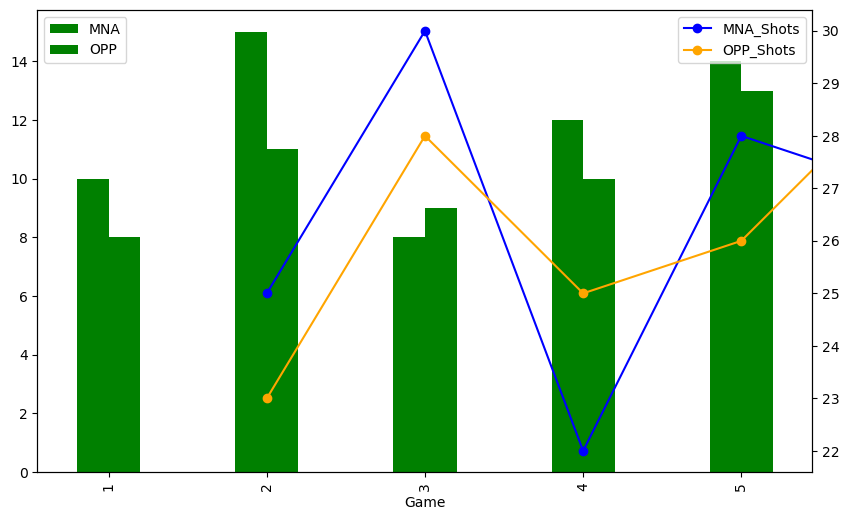

In [26]:
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

plt.show()

In [5]:
## Record 

regular.head()
regular.Outcome.value_counts()

Outcome
W      18
L      18
OTL     6
SOL     4
OTW     2
Name: count, dtype: int64

In [6]:
shots.head()

,Location,Photo,MNA Shots,MNA G,Opp Shots,Opp G
0,1,Sample 2.1,0.0,0.0,1.0,1.0
1,2,Sample 2.1,1.0,0.0,0.0,0.0
2,3,Sample 2.1,0.0,0.0,1.0,0.0
3,4,Sample 2.1,0.0,0.0,0.0,0.0
4,5,Sample 2.1,0.0,0.0,0.0,0.0


In [7]:
# shooting
agg_shots = shots.drop(columns = ['Photo']).groupby('Location').sum()
agg_shots.reset_index(inplace = True)

In [16]:
agg_shots['Shots'] = agg_shots['Opp Shots'] + agg_shots['MNA Shots']
agg_shots['Total Goals'] = agg_shots['Opp G'] + agg_shots['MNA G']
agg_shots['Total Shots'] = agg_shots['Shots'] + agg_shots['Total Goals']
agg_shots['Shooting PCT'] = agg_shots['Total Goals']/ agg_shots['Total Shots']
agg_shots['Shot Dist'] = agg_shots['Total Shots'] / agg_shots['Total Shots'].sum()
agg_shots['Goal Dist'] = agg_shots['Total Goals'] / agg_shots['Total Goals'].sum()
agg_shots['Goal Yeild/1000'] = (agg_shots['Shot Dist'] *agg_shots['Shooting PCT'])*100

In [17]:
agg_shots.fillna(0,inplace = True)

In [18]:
agg_shots['Goal Yeild/1000'].sum()

21.42857142857143

In [19]:
agg_shots['Total Goals'].sum()/ agg_shots['Total Shots'].sum()

0.21428571428571427

In [20]:
def custom_colormap(dataframe, col):
    colors = [(1, 1, 1), (1, 1, 0), (1, 0.5, 0), (1, 0, 0)]  # RGB values for white, yellow, orange, red
    cmap_name = 'custom_colormap'
    cmap = ListedColormap(colors)
    #cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
    #cmap.set_over('red')  # Set the color for values exceeding the maximum
    #cmap.set_under('white')  # Set the color for values below the minimum
    norm = Normalize(vmin=0, vmax=np.max(dataframe[col]))
    return cmap, norm

In [21]:
def getShotMap(dataframe, col, scheme):
    grid_values = dataframe[col].values.reshape((6, 6))
    # Load the net image
    background_img = plt.imread(net_pic)
    # Create subplots with 33% vertical shrinkage
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize if needed
    # Set the extent to match the matrix (adjust vertical extent as needed)
    extent_matrix = (0, 6, 0, 6)
    extent_image = (0, 6, 0, 6)  # Match the matrix size
    # Plot the 6x6 matrix first
    cmap = plt.get_cmap(scheme)
    im = ax.imshow(grid_values, cmap=scheme, interpolation='nearest', vmin=0, vmax=np.max(dataframe[col]), extent=extent_matrix)
    # Add text annotations for each cell with floating-point labels
    for i in range(6):
        for j in range(6):
            ax.text(j + 0.5, i + 0.5, f'{grid_values[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)
    # Plot the background image on top of the matrix with some transparency
    ax.imshow(background_img, extent=extent_image, aspect='auto', zorder=1, alpha=0.5)
    # Add a colorbar for reference
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.1)
    # Hide axes for better visibility
    ax.axis('off')
    # Set the title
    ax.set_title(col)
    # Show the plot
    plt.show()


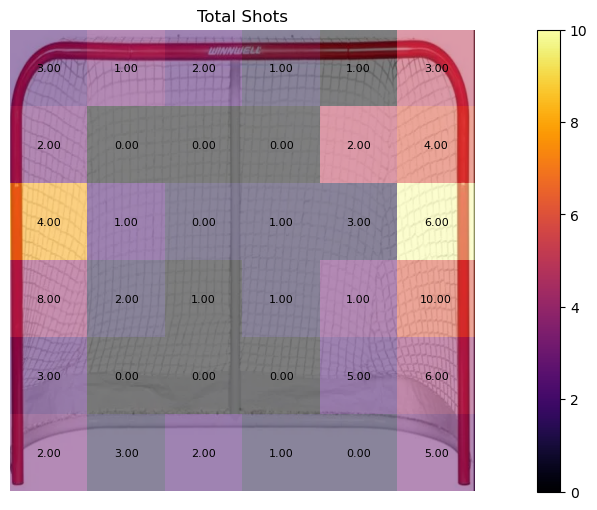

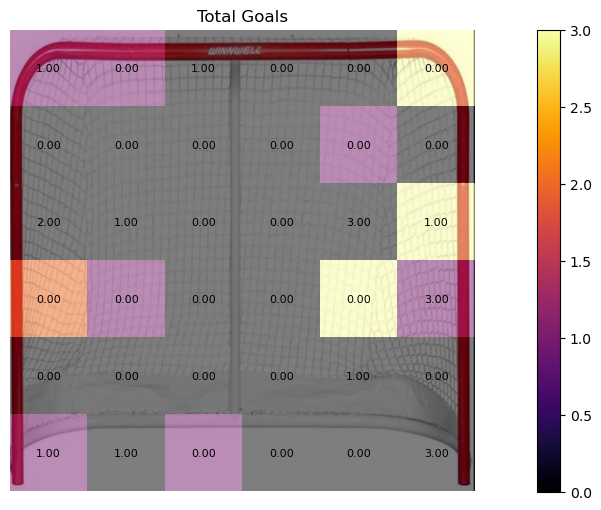

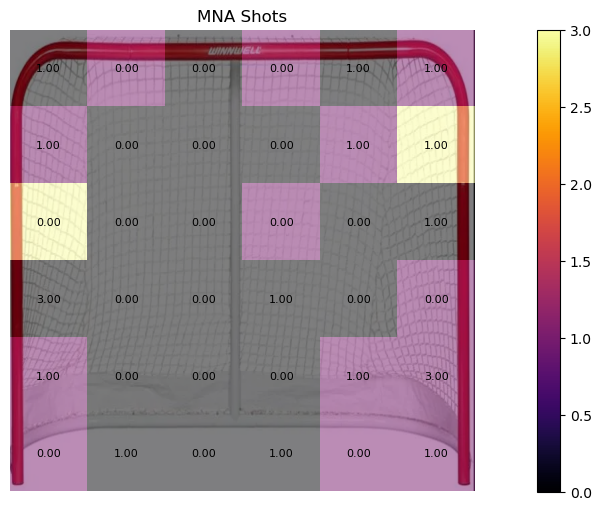

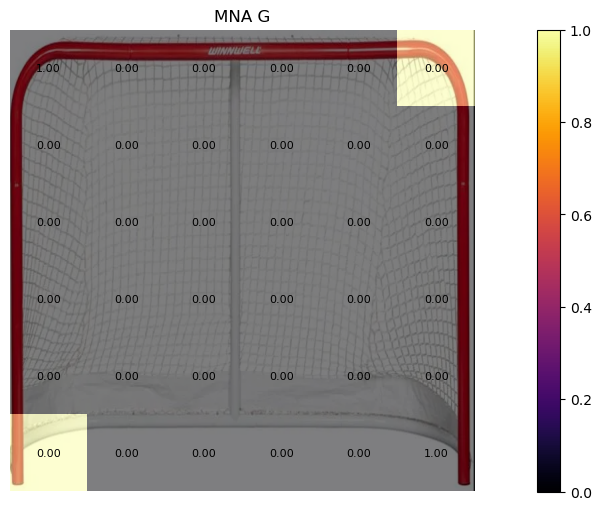

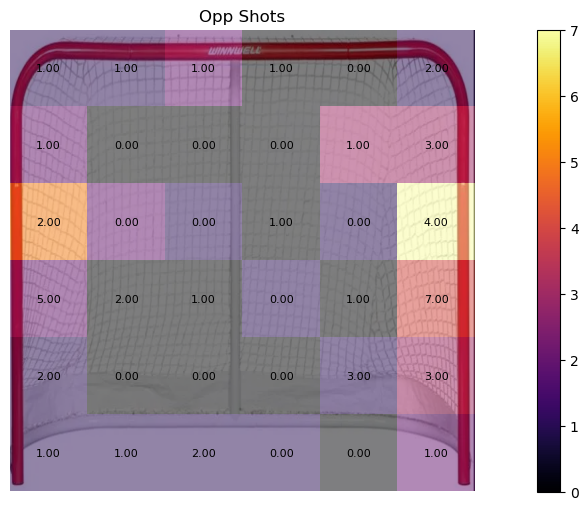

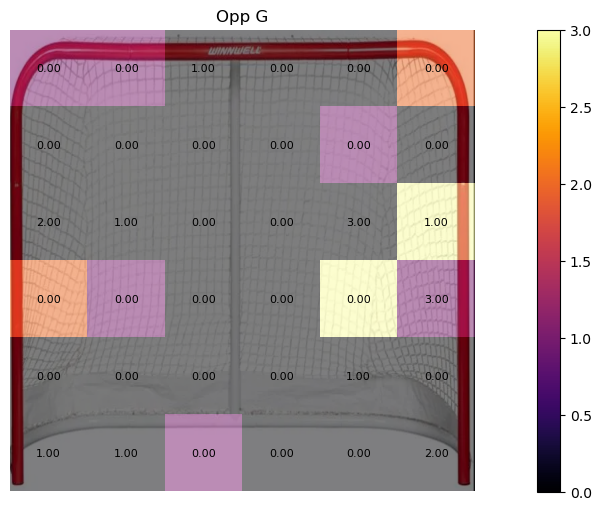

In [22]:
for value in ['Total Shots','Total Goals','MNA Shots', 'MNA G', 'Opp Shots', 'Opp G']:
    getShotMap(agg_shots, value, 'inferno') #bilinear

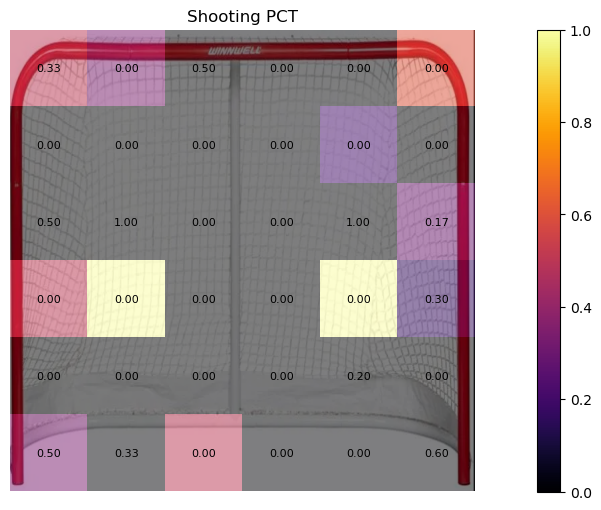

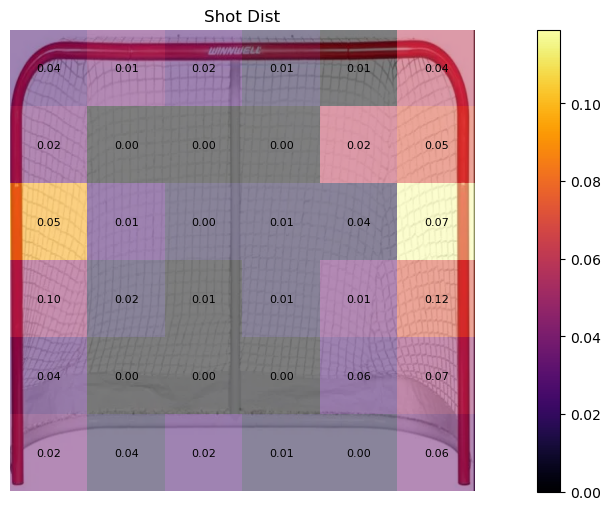

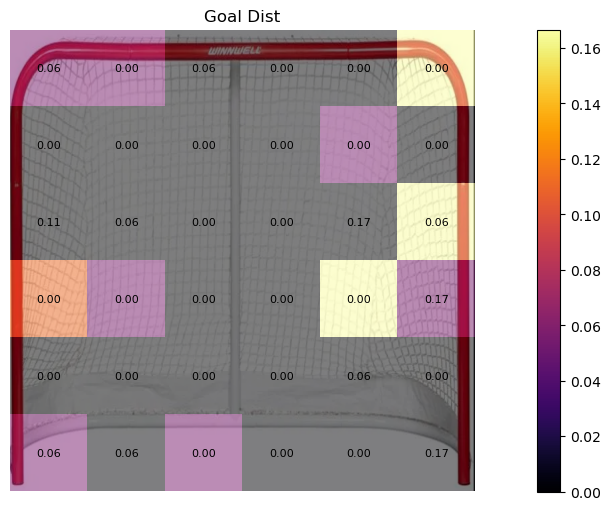

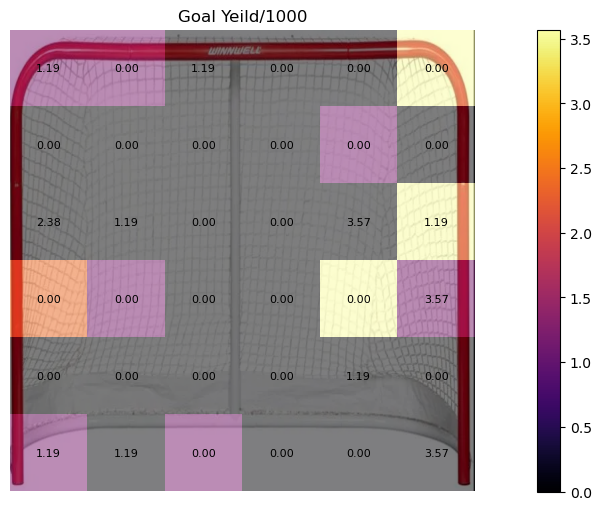

In [24]:
for value in ['Shooting PCT','Shot Dist', 'Goal Dist', 'Goal Yeild/1000']:
    getShotMap(agg_shots, value, 'inferno')